<h1 align=center> Strock Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import RandomOverSampler,SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./full_data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
le = LabelEncoder()

In [6]:
data.shape

(4981, 11)

In [7]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=le.fit_transform(data[i])

In [8]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
sc = StandardScaler()

In [11]:
x = sc.fit_transform(x)

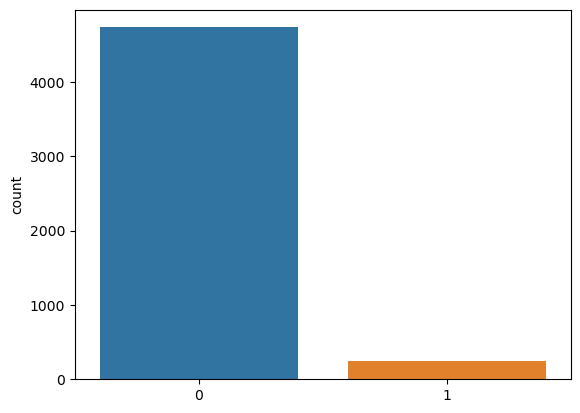

In [12]:
sns.countplot(x=y)
plt.show()

In [13]:
x,y = SMOTE().fit_resample(x,y)

In [14]:
models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [15]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("Cross validation model:{}".format(name))
    print("Mean score:",np.mean(scores)*100)
    print("*"*100)

Cross validation model:LogisticRegression
Mean score: 78.4175799397675
****************************************************************************************************
Cross validation model:RandomForestClassifier
Mean score: 95.89100776682122
****************************************************************************************************
Cross validation model:DecisionTreeClassifier
Mean score: 91.73937503767323
****************************************************************************************************
Cross validation model:AdaBoostClassifier
Mean score: 86.33067369751144
****************************************************************************************************
Cross validation model:GradientBoostingClassifier
Mean score: 90.70409281786705
****************************************************************************************************
Cross validation model:KNeighborsClassifier
Mean score: 90.91507397344681
**********************************************

### RandomForestClassifier

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [17]:
Model = RandomForestClassifier()

In [18]:
Model.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
print("Model trained with Random Forest Classifier")
train_score = accuracy_score(y_train,Model.predict(x_train))
test_score = accuracy_score(y_test,Model.predict(x_test))
train_conf = confusion_matrix(y_train,Model.predict(x_train))
test_conf = confusion_matrix(y_test,Model.predict(x_test))
print("Model accuracy on train is :",train_score)
print("Model accuracy on test is :",test_score)
print("Confusion_matrix train is :",train_conf)
print("Confusion_matrix test is :",test_conf)
print("Wrong predictions made :",((y_test != Model.predict(x_test)).sum(),'/',((y_test==Model.predict(x_test)).sum()+(y_test != Model.predict(x_test)).sum())))

Model trained with Random Forest Classifier
Model accuracy on train is : 1.0
Model accuracy on test is : 0.9561774023231256
Confusion_matrix train is : [[3787    0]
 [   0 3785]]
Confusion_matrix test is : [[895  51]
 [ 32 916]]
Wrong predictions made : (83, '/', 1894)


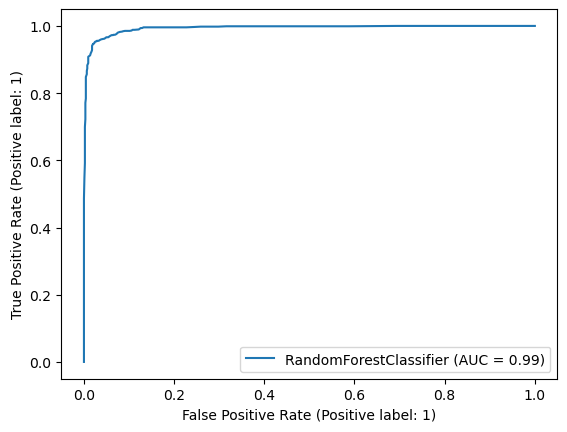

In [20]:
ROC_display = RocCurveDisplay.from_estimator(Model,x_test,y_test)